<a href="https://colab.research.google.com/github/shashwat73/Predicting-Dual-Axis-Generation/blob/main/Dual_Axis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

data = files.upload()

Saving solar_data_copy_10%.csv to solar_data_copy_10% (4).csv


In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


R-squared value: 0.644716748511089
MAE: 77.67709866935952


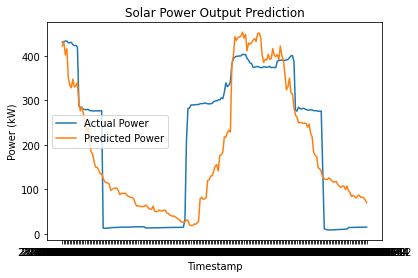

In [ ]:
# Load the solar data from the CSV file
solar_data = pd.read_csv("solar_data_copy_10%.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Train a linear regression model on the training data
regressor = LinearRegression()
regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed']], train_data['Power_Generated'])

# Use the trained model to predict solar power output for the test data
test_data['Predicted Power'] = regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed']])

# Calculate the R-squared value and MAE for the predictions
r2 = r2_score(test_data['Power_Generated'], test_data['Predicted Power'])
mae = mean_absolute_error(test_data['Power_Generated'], test_data['Predicted Power'])
print(f"R-squared value: {r2}")
print(f"MAE: {mae}")

# Make a line graph that compares the predicted and actual power values
plt.plot(test_data['Timestamp'], test_data['Power_Generated'], label='Actual Power')
plt.plot(test_data['Timestamp'], test_data['Predicted Power'], label='Predicted Power')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Solar Power Output Prediction')
plt.legend()
plt.show()